<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CUxx_Nombre del caso de uso</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > III - Feature Engineering Domain </font>
***
> # <font color='steelblue'> <b>14.- Feature Data Transform</font>

<font color='steelblue'>Feature Data Transform is the process that allows change (if is required) the type and/or distribution of data features (e.g. scaling, normalizing o standardizing data features).</font>


## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Perform Basic Data Transforms						
    
<font color='steelblue'><b>Perform Categorical Variable Transformation						
- Encode Transformation					
    - One-hot encoding				
    - Ordinal encoding				
    - Dummy encoding				
- Evaluate a Logistic Regression model					
- Consider Embedding if text mining context					
    
<font color='steelblue'><b>Perform Numeric Variable Transformation						
- Scale Transformation					
    - Normalization				
    - Standardization				
    - IQR Robust Scaler Transform				
    - Evaluate a KNN model				
- Distribution Transformation					
    - Discretization				
        - Uniform			
        - Clustered(k-Means)			
        - Quantile			
            - Normal Quantile		
            - Uniform Quantile		
            - Evaluate a KNN model		
        - Evaluate a KNN model			
    - Power transforms (Make Distributions More Gaussian)				
        - Box-Cox Transform			
        - Yeo-Johnson Transform			
        - Evaluate a KNN model			


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: xxxxxxxxxx</font>

## <font color='green'>Settings</font>

In [1]:
# Libraries to use
import os
from pathlib import Path
import pandas as pd
import easygui as GUI
import numpy as np
import matplotlib.pyplot as plt

## <font color='green'>Data Load</font>

In [4]:
current_path = os.getcwd()
path_origen = current_path
# Obtenemos el nombre del entorno que es el nombre del directorio raiz
raiz  = os.environ.get('CONDA_DEFAULT_ENV')
# Nos situamos en el directorio donde está el fichero (código) para carga de datos
os.chdir('C:\\' + raiz.__str__() + '\\CODE\\X - COMMON PROCEDURES\\')
# Ejecutamos el fichero
%run -i load_data.py
# No posicionamos de nuevo en el directorio origen
os.chdir(path_origen)
# Visualizamos el fichero cargado
data.head()

Uploaded File:
File name: diabetes.csv
File size:  (768, 9)
 
Generated Variables to use:
path_default: C:\Kapreolus\USE CASES\CLASSIFICATION\Binary\Diabetes\
path_data: C:\Kapreolus\USE CASES\CLASSIFICATION\Binary\Diabetes\Data\
file_data: C:\Kapreolus\USE CASES\CLASSIFICATION\Binary\Diabetes\Data\diabetes.csv
file_name: diabetes
Other variables: data, X, y, X_names, target(or y_name), target_index


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Basic Data Transforms

In [3]:
data.head()

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Selecting

In [4]:
data.loc[:3]

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [40]:
data.loc[3:]

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Meses,Target
3,1,89,66,23,94,28.1,0.167,21,252,0
4,0,137,40,35,168,43.1,2.288,33,396,1
5,5,116,74,0,0,25.6,0.201,30,360,0
6,3,78,50,32,88,31.0,0.248,26,312,1
7,10,115,0,0,0,35.3,0.134,29,348,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,756,0
764,2,122,70,27,0,36.8,0.340,27,324,0
765,5,121,72,23,112,26.2,0.245,30,360,0
766,1,126,60,0,0,30.1,0.349,47,564,1


In [41]:
data.loc[3:9]

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Meses,Target
3,1,89,66,23,94,28.1,0.167,21,252,0
4,0,137,40,35,168,43.1,2.288,33,396,1
5,5,116,74,0,0,25.6,0.201,30,360,0
6,3,78,50,32,88,31.0,0.248,26,312,1
7,10,115,0,0,0,35.3,0.134,29,348,0
8,2,197,70,45,543,30.5,0.158,53,636,1
9,8,125,96,0,0,0.0,0.232,54,648,1


In [44]:
data.loc[3:9, ['Age','Target']]

,Age,Target
3,21,0
4,33,1
5,30,0
6,26,1
7,29,0
8,53,1
9,54,1


In [45]:
data.iloc[3:9, 2:5]

,Diastolic,Triceps,Serum
3,66,23,94
4,40,35,168
5,74,0,0
6,50,32,88
7,0,0,0
8,70,45,543


### Data Filtering

In [37]:
NP = ['2','3']
datanew=data[data.NPregnant.isin(NP)]

In [36]:
datanew

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Meses,Target
6,3,78,50,32,88,31.0,0.248,26,312,1
8,2,197,70,45,543,30.5,0.158,53,636,1
20,3,126,88,41,235,39.3,0.704,27,324,0
31,3,158,76,36,245,31.6,0.851,28,336,1
32,3,88,58,11,54,24.8,0.267,22,264,0
...,...,...,...,...,...,...,...,...,...,...
741,3,102,44,20,94,30.8,0.400,26,312,0
748,3,187,70,22,200,36.4,0.408,36,432,1
752,3,108,62,24,0,26.0,0.223,25,300,0
760,2,88,58,26,16,28.4,0.766,22,264,0


In [35]:
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Meses,Target
0,6,148,72,35,0,33.6,0.627,50,600,1
1,1,85,66,29,0,26.6,0.351,31,372,0
2,8,183,64,0,0,23.3,0.672,32,384,1
3,1,89,66,23,94,28.1,0.167,21,252,0
4,0,137,40,35,168,43.1,2.288,33,396,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,756,0
764,2,122,70,27,0,36.8,0.340,27,324,0
765,5,121,72,23,112,26.2,0.245,30,360,0
766,1,126,60,0,0,30.1,0.349,47,564,1


### Data Filtering by Query

In [3]:
# Acceso a filas con valor determinado de una columna
# data.query('Plasma > Age')
# data.query('Plasma > 180')
datanew=data.query('Plasma == 197')
# Data permanece intacto

In [4]:
datanew

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
8,2,197,70,45,543,30.5,0.158,53,1
228,4,197,70,39,744,36.7,2.329,31,0
408,8,197,74,0,0,25.9,1.191,39,1
579,2,197,70,99,0,34.7,0.575,62,1


### Insert New Column

In [9]:
#new column
meses = data.Age*12
#insert the new column at position 8
data.insert(8, 'Meses', meses)

ValueError: cannot insert Meses, already exists

In [6]:
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Meses,Target
0,6,148,72,35,0,33.6,0.627,50,600,1
1,1,85,66,29,0,26.6,0.351,31,372,0
2,8,183,64,0,0,23.3,0.672,32,384,1
3,1,89,66,23,94,28.1,0.167,21,252,0
4,0,137,40,35,168,43.1,2.288,33,396,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,756,0
764,2,122,70,27,0,36.8,0.340,27,324,0
765,5,121,72,23,112,26.2,0.245,30,360,0
766,1,126,60,0,0,30.1,0.349,47,564,1


### Delete Column

In [18]:
datanew=data.drop(columns=['Meses'])

In [15]:
datanew.head()

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
data.head()

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Meses,Target
0,6,148,72,35,0,33.6,0.627,50,600,1
1,1,85,66,29,0,26.6,0.351,31,372,0
2,8,183,64,0,0,23.3,0.672,32,384,1
3,1,89,66,23,94,28.1,0.167,21,252,0
4,0,137,40,35,168,43.1,2.288,33,396,1


### Replace Values

In [69]:
datanew=data.replace({'Target':{1:'True', 0:'False'}})

In [70]:
datanew

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Meses,Target,AgeRank
0,6,148,72,35,0,33.6,0.627,50,600,True,683.5
1,1,85,66,29,0,26.6,0.351,31,372,False,429.5
2,8,183,64,0,0,23.3,0.672,32,384,True,449.5
3,1,89,66,23,94,28.1,0.167,21,252,False,32.0
4,0,137,40,35,168,43.1,2.288,33,396,True,466.0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,756,False,749.5
764,2,122,70,27,0,36.8,0.340,27,324,False,316.5
765,5,121,72,23,112,26.2,0.245,30,360,False,407.0
766,1,126,60,0,0,30.1,0.349,47,564,True,666.5


### Conditional Replace Values

<font color='tomato'>Select column</font>

In [5]:
column = 'Age'

<font color='darkgrey'><b>Operation</font>

In [25]:
# Genero nuevos datos con el reemplazo
datanew=data[column].where(data[column] > 30 , 0)

In [28]:
datanew

0      50
1      31
2      32
3       0
4      33
       ..
763    63
764     0
765     0
766    47
767     0
Name: Age, Length: 768, dtype: int64

### Rank Data

<font color='tomato'>Select column</font>

In [5]:
column = 'Age'
column_rank='AgeRank'

<font color='darkgrey'><b>Operation</font>

In [5]:
# Rank function assigns rank to the values. Assume we have a series s that contains [1,7,5,3]. 
# The ranks assigned to these values will be [1,4,3,2].
data[column_rank] = data[column].rank()

In [6]:
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target,AgeRank
0,6,148,72,35,0,33.6,0.627,50,1,683.5
1,1,85,66,29,0,26.6,0.351,31,0,429.5
2,8,183,64,0,0,23.3,0.672,32,1,449.5
3,1,89,66,23,94,28.1,0.167,21,0,32.0
4,0,137,40,35,168,43.1,2.288,33,1,466.0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,749.5
764,2,122,70,27,0,36.8,0.340,27,0,316.5
765,5,121,72,23,112,26.2,0.245,30,0,407.0
766,1,126,60,0,0,30.1,0.349,47,1,666.5


In [27]:
# Data sigue igual
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Meses,Target
0,6,148,72,35,0,33.6,0.627,50,600,1
1,1,85,66,29,0,26.6,0.351,31,372,0
2,8,183,64,0,0,23.3,0.672,32,384,1
3,1,89,66,23,94,28.1,0.167,21,252,0
4,0,137,40,35,168,43.1,2.288,33,396,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,756,0
764,2,122,70,27,0,36.8,0.340,27,324,0
765,5,121,72,23,112,26.2,0.245,30,360,0
766,1,126,60,0,0,30.1,0.349,47,564,1


## Categorical Variable Transformation

### Encode Transformation

#### Data to Transform

Use dataset as example: breast cancer

Ref: 

*Jason Brownlee (2020). D⁠a⁠t⁠a⁠ ⁠P⁠r⁠e⁠p⁠a⁠r⁠a⁠t⁠i⁠on⁠ ⁠f⁠o⁠r⁠ ⁠⁠M⁠a⁠c⁠h⁠i⁠n⁠e⁠ ⁠L⁠e⁠a⁠r⁠n⁠i⁠n⁠g Data Cleaning, Feature Selection, and Data Transforms in Python. Chapter 19 How to Encode Categorical Data*

In [10]:
print(data.shape)

(286, 10)


In [11]:
data

,Age,Menopause,TumorSize,InNodes,NodeCaps,DegMalig,Breast,BreastQuad,Irradiat,Target
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


#### Evaluating a Logistic Regression model

##### Evaluating without transform

It is not possible to do it without transforming since the values are categorical

##### Evaluating Encoding Transformations

<font color='tomato'>Select columns</font>

In [17]:
# Select type of transformation to use
# ordinal, onehot, dummy
transf='onehot'
# For 'dummy', select which category will become the one that is 
# assigned all zero values, called the baseline.
# 'first' --> so that the first category is used
# 'name of category' can be used instead
baseline='first'

<font color='darkgrey'><b>Operation</font>

In [18]:
# evaluate logistic regression on the dataset with an ordinal encoding
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
# retrieve the array of data
data_trans = data.values
# separate into input and output columns
X = data_trans[:, :-1].astype(str)
y = data_trans[:, -1].astype(str)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
if transf=='ordinal':
    # ordinal encode input variables
    ordinal_encoder = OrdinalEncoder()
    ordinal_encoder.fit(X_train)
    X_train = ordinal_encoder.transform(X_train)
    X_test = ordinal_encoder.transform(X_test)
elif transf=='onehot':
    # ordinal encode input variables
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoder.fit(X_train)
    X_train = onehot_encoder.transform(X_train)
    X_test = onehot_encoder.transform(X_test)
elif transf=='dummy':
    # ordinal encode input variables
    onehot_encoder = OneHotEncoder(drop=baseline,sparse=False)
    onehot_encoder.fit(X_train)
    X_train = onehot_encoder.transform(X_train)
    X_test = onehot_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.53


#### Ordinal Encoding Transform

In [20]:
# ordinal encode the breast cancer dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# retrieve the array of data
data_trans = data.values
# separate into input and output columns
X = data_trans[:, :-1].astype(str)
y = data_trans[:, -1].astype(str)
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])
print('Output', y.shape)
print(y[:5])

Input (286, 9)
[[2. 2. 2. 0. 1. 2. 1. 2. 0.]
 [3. 0. 2. 0. 0. 0. 1. 0. 0.]
 [3. 0. 6. 0. 0. 1. 0. 1. 0.]
 [2. 2. 6. 0. 1. 2. 1. 1. 1.]
 [2. 2. 5. 4. 1. 1. 0. 4. 0.]]
Output (286,)
[1 0 1 0 1]


In [22]:
# Generate new data set
new_data=pd.concat([pd.DataFrame(X),pd.DataFrame(y)], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,Age,Menopause,TumorSize,InNodes,NodeCaps,DegMalig,Breast,BreastQuad,Irradiat,Target
0,2.0,2.0,2.0,0.0,1.0,2.0,1.0,2.0,0.0,1
1,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,3.0,0.0,6.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,2.0,2.0,6.0,0.0,1.0,2.0,1.0,1.0,1.0,0
4,2.0,2.0,5.0,4.0,1.0,1.0,0.0,4.0,0.0,1


#### One Hot Encoding Transform

In [9]:
# ordinal encode the breast cancer dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# retrieve the array of data
data_trans = data.values
# separate into input and output columns
X = data_trans[:, :-1].astype(str)
y = data_trans[:, -1].astype(str)
# ordinal encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])
print('Output', y.shape)
print(y[:5])

Input (286, 43)
[[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]]
Output (286,)
[1 0 1 0 1]


In [11]:
# Generate new data set
new_data=pd.concat([pd.DataFrame(X),pd.DataFrame(y)], axis=1)
data=new_data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


#### Dummy Variable Encoding Transform

<font color='tomato'>Select columns</font>

In [8]:
# Select which category will become the one that is assigned all 
# zero values, called the baseline.
# 'first' --> so that the first category is used
# 'name of category' can be used instead
baseline='first'

<font color='darkgrey'><b>Operation</font>

In [9]:
# ordinal encode the breast cancer dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# retrieve the array of data
data_trans = data.values
# separate into input and output columns
X = data_trans[:, :-1].astype(str)
y = data_trans[:, -1].astype(str)
# ordinal encode input variables
onehot_encoder = OneHotEncoder(drop=baseline,sparse=False)
X = onehot_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])
print('Output', y.shape)
print(y[:5])

Input (286, 34)
[[0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 1. 1. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]]
Output (286,)
[1 0 1 0 1]


In [6]:
# Generate new data set
new_data=pd.concat([pd.DataFrame(X),pd.DataFrame(y)], axis=1)
data=new_data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,0
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


### Embedding Transformation

Specific encode for text mining context. No code here.

## Numeric Variable Transformation: Scale

### Data to Transform

Use dataset as example: Diabetes

Ref: 

*Jason Brownlee (2020). D⁠a⁠t⁠a⁠ ⁠P⁠r⁠e⁠p⁠a⁠r⁠a⁠t⁠i⁠on⁠ ⁠f⁠o⁠r⁠ ⁠⁠M⁠a⁠c⁠h⁠i⁠n⁠e⁠ ⁠L⁠e⁠a⁠r⁠n⁠i⁠n⁠g Data Cleaning, Feature Selection, and Data Transforms in Python. Chapter 17. How to Scale Numerical Data*

In [5]:
print(data.shape)

(768, 9)


In [6]:
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


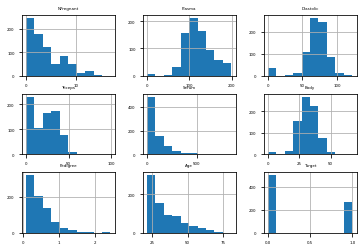

In [7]:
# histograms of the variables
fig = data.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

### Evaluating a KNN model

#### Evaluating without tranform

In [10]:
# evaluate knn on the raw diabetes dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load the dataset
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


#### Evaluating Normalization Tranform

In [9]:
# evaluate knn on the diabetes dataset with minmax scaler transform
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.739 (0.053)


#### Evaluating Standarization Transform

In [11]:
# evaluate knn on the diabetes dataset with standard scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.741 (0.050)


#### Evaluating IQR Robust Scaler Transform

Ref.

*Jason Brownlee (2020). D⁠a⁠t⁠a⁠ ⁠P⁠r⁠e⁠p⁠a⁠r⁠a⁠t⁠i⁠on⁠ ⁠f⁠o⁠r⁠ ⁠⁠M⁠a⁠c⁠h⁠i⁠n⁠e⁠ ⁠L⁠e⁠a⁠r⁠n⁠i⁠n⁠g Data Cleaning, Feature Selection, and Data Transforms in Python. Chapter 18 How to Scale Data With Outliers*

In [11]:
# evaluate knn on the diabetes dataset with standard scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = RobustScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.734 (0.044)


##### Exploring Robust Scaler Range

>1 0.734 (0.054)
>5 0.736 (0.051)
>10 0.739 (0.047)
>15 0.740 (0.045)
>20 0.734 (0.050)
>25 0.734 (0.044)
>30 0.735 (0.042)


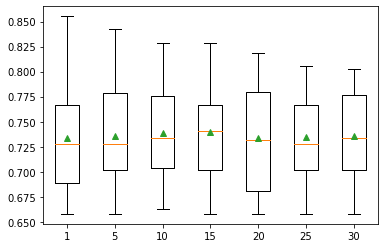

In [12]:
# explore the scaling range of the robust scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# get a list of models to evaluate
def get_models():
    models = dict()
    for value in [1, 5, 10, 15, 20, 25, 30]:
        # define the pipeline
        trans = RobustScaler(quantile_range=(value, 100-value))
        model = KNeighborsClassifier()
        models[str(value)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

    # plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Normalization Transform

<font color='tomato'>Select columns</font>

In [ ]:
# Select features to Normalizate
data_transf = data.values[:, :-1] # Input but not Target

<font color='darkgrey'><b>Operation</font>

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.234095    0.333333  
max      1.000

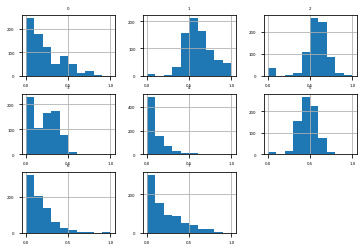

In [8]:
from sklearn.preprocessing import MinMaxScaler
# perform a transform of the dataset
trans = MinMaxScaler()
data_transf = trans.fit_transform(data_transf)
# convert the array back to a dataframe
dataset = pd.DataFrame(data_transf)
# summarize
print(dataset.describe())

In [ ]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

<font color='tomato'>Select columns</font>

In [13]:
# Data to concatenate to transformed data
d=data[target] # Output

<font color='darkgrey'><b>Operation</font>

In [14]:
# Generate new data set
new_data=pd.concat([dataset, d], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


### Standarization Transform

<font color='tomato'>Select columns</font>

In [6]:
# Select features to Transform
data_transf = data.values[:, :-1] # Input but not Target

<font color='darkgrey'><b>Operation</font>

In [8]:
from sklearn.preprocessing import StandardScaler
# perform a transform of the dataset
trans = StandardScaler()
data_transf = trans.fit_transform(data_transf)
# convert the array back to a dataframe
dataset = pd.DataFrame(data_transf)
# summarize
print(dataset.describe())

                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean   1.387779e-17 -4.625929e-18  1.040834e-17  5.204170e-17 -1.619075e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   1.850372e-17  9.251859e-18 -3.469447e-18  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01 -6.889685e-01 -7.8

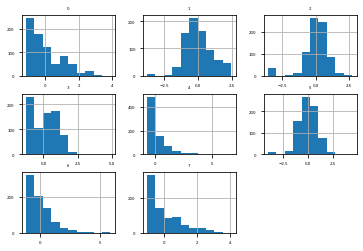

In [9]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

<font color='tomato'>Select columns</font>

In [13]:
# Data to concatenate to transformed data
d=data[target] # Output

<font color='darkgrey'><b>Operation</font>

In [14]:
# Generate new data set
new_data=pd.concat([dataset, d], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


### IQR Robust Scaler Transform

Ref.

*Jason Brownlee (2020). D⁠a⁠t⁠a⁠ ⁠P⁠r⁠e⁠p⁠a⁠r⁠a⁠t⁠i⁠on⁠ ⁠f⁠o⁠r⁠ ⁠⁠M⁠a⁠c⁠h⁠i⁠n⁠e⁠ ⁠L⁠e⁠a⁠r⁠n⁠i⁠n⁠g Data Cleaning, Feature Selection, and Data Transforms in Python. Chapter 18 How to Scale Data With Outliers*

<font color='tomato'>Select columns</font>

In [6]:
# Select features to Transform
data_transf = data.values[:, :-1] # Input but not Target

<font color='darkgrey'><b>Operation</font>

In [7]:
from sklearn.preprocessing import RobustScaler
# perform a  transform of the dataset
trans = RobustScaler()
data_transf = trans.fit_transform(data_transf)
# convert the array back to a dataframe
dataset = pd.DataFrame(data_transf)
# summarize
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.169010    0.094413   -0.160807   -0.076986    0.387422   -0.000798   
std      0.673916    0.775094    1.075323    0.498507    0.905650    0.847759   
min     -0.600000   -2.836364   -4.000000   -0.718750   -0.239686   -3.440860   
25%     -0.400000   -0.436364   -0.555556   -0.718750   -0.239686   -0.505376   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.600000    0.563636    0.444444    0.281250    0.760314    0.494624   
max      2.800000    1.987879    2.777778    2.375000    6.408644    3.774194   

                6           7  
count  768.000000  768.000000  
mean     0.259807    0.249464  
std      0.866219    0.691778  
min     -0.769935   -0.470588  
25%     -0.336601   -0.294118  
50%      0.000000    0.000000  
75%      0.663399    0.705882  
max      5.352

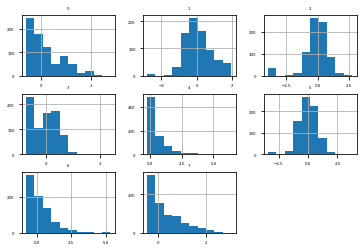

In [8]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

<font color='tomato'>Select columns</font>

In [9]:
# Data to concatenate to transformed data
d=data[target] # Output

<font color='darkgrey'><b>Operation</font>

In [10]:
# Generate new data set
new_data=pd.concat([dataset, d], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Target
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294,1
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647,0
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471,1
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588,0
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294,1


## Numeric Variable Transformation: Distribution

###	Discretization Transform

Use dataset as example: Sonar

Ref: 

*Jason Brownlee (2020). D⁠a⁠t⁠a⁠ ⁠P⁠r⁠e⁠p⁠a⁠r⁠a⁠t⁠i⁠on⁠ ⁠f⁠o⁠r⁠ ⁠⁠M⁠a⁠c⁠h⁠i⁠n⁠e⁠ ⁠L⁠e⁠a⁠r⁠n⁠i⁠n⁠g Data Cleaning, Feature Selection, and Data Transforms in Python. Chapter 22 How to Transform Numerical to Categorical Data*

#### Data to Transform

In [5]:
# Visualize data types
data.dtypes

E1        float64
E2        float64
E3        float64
E4        float64
E5        float64
           ...   
E57       float64
E58       float64
E59       float64
E60       float64
Target     object
Length: 61, dtype: object

In [6]:
# summarize the shape of the dataset
print(data.shape)

(208, 61)


In [95]:
# summarize each variable
data.describe()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E51,E52,E53,E54,E55,E56,E57,E58,E59,E60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


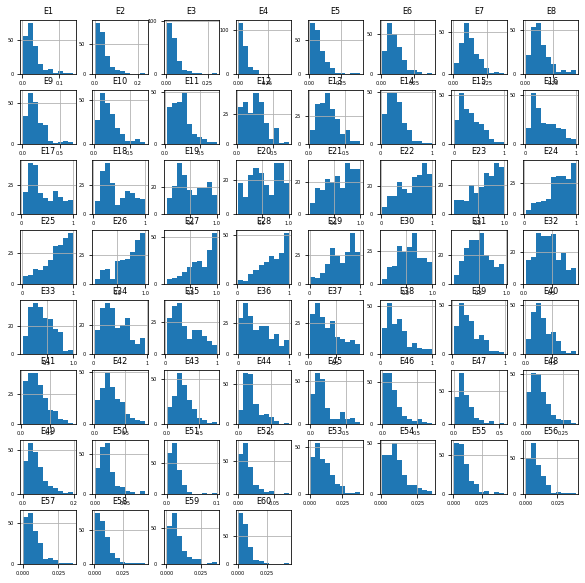

In [99]:
# histograms of the variables
fig = data.hist(xlabelsize=5, ylabelsize=5, figsize=(10,10))
[x.title.set_size(8) for x in fig.ravel()]
# show the plot
pyplot.show()

#### Evaluating a KNN model

##### Evaluating without tranform

In [ ]:
# evaluate knn on the raw dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

##### Evaluating Discretization Transformations

<font color='tomato'>Select columns</font>

In [4]:
# n_bins (values for estrategy=kmean 3 to 5)
n_b=3
# strategy 'uniform' 'kmeans' 'quantile'
strat='kmeans'
# Dataset (full dataset, input and output variables)
# NOTE: be careful if the dataset has 
# been modified by previous processes
data=data

<font color='darkgrey'><b>Operation</font>

In [5]:
# evaluate knn on the dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=n_b, encode='ordinal', strategy=strat)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.814 (0.088)


In [126]:
print(data.shape)

(208, 60)


##### Evaluating Discretization Transformations Tuning n_bins Hyperparameter

<font color='tomato'>Select columns</font>

In [4]:
# n_bins range to tune (r1 to r2)
# values for estrategy=kmean f1=3 to r2=5
r1=2
r2=11
# strategy 'uniform' 'kmeans' 'quantile'
strat='quantile'
# Dataset (full dataset, input and output variables)
# NOTE: be careful if the dataset has 
# been modified by previous processes
data=data

<font color='darkgrey'><b>Operation</font>

>2 0.806 (0.080)
>3 0.867 (0.070)
>4 0.835 (0.083)
>5 0.838 (0.070)
>6 0.836 (0.071)
>7 0.854 (0.071)
>8 0.837 (0.077)
>9 0.841 (0.069)
>10 0.840 (0.072)


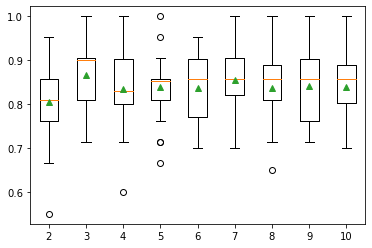

In [5]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# get a list of models to evaluate
models = dict()
for i in range(r1,r2):
    # define the pipeline
    trans = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy=strat)
    model = KNeighborsClassifier()
    models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Uniform Discretization Transform

<font color='tomato'>Select columns</font>

In [112]:
# retrieve just the numeric input values
data_to_trans = data.values[:, :-1]

<font color='darkgrey'><b>Operation</font>

In [45]:
from sklearn.preprocessing import KBinsDiscretizer
# perform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = trans.fit_transform(data_to_trans)
# convert the array back to a dataframe
data_trans_df = pd.DataFrame(data_trans)

In [48]:
data_trans_df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.0,1.0,1.0,0.0,2.0,2.0,4.0,3.0,4.0,2.0,...,2.0,0.0,1.0,4.0,1.0,4.0,5.0,1.0,2.0,0.0
1,3.0,2.0,2.0,1.0,2.0,6.0,5.0,7.0,4.0,3.0,...,1.0,1.0,2.0,1.0,1.0,4.0,3.0,1.0,1.0,0.0
2,1.0,2.0,3.0,2.0,2.0,5.0,6.0,8.0,8.0,8.0,...,0.0,3.0,4.0,2.0,3.0,6.0,8.0,3.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,2.0,1.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0,2.0
4,5.0,2.0,1.0,0.0,1.0,1.0,3.0,5.0,5.0,6.0,...,1.0,0.0,1.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1.0,1.0,0.0,0.0,0.0,4.0,5.0,3.0,3.0,3.0,...,2.0,1.0,2.0,5.0,0.0,2.0,1.0,2.0,5.0,3.0
204,2.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,...,0.0,0.0,2.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0
205,3.0,1.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,3.0,...,1.0,2.0,0.0,1.0,1.0,2.0,3.0,3.0,2.0,0.0
206,2.0,1.0,1.0,1.0,0.0,3.0,3.0,2.0,2.0,3.0,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0


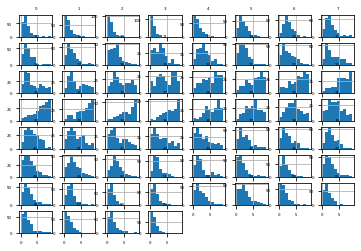

In [50]:
# histograms of the new variables
fig = data_trans_df.hist(xlabelsize=4, ylabelsize=4, figsize=(10,10))
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [86]:
# Generate new data set
new_data=pd.concat([data_trans_df,data[target]], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E52,E53,E54,E55,E56,E57,E58,E59,E60,Target
0,1.0,1.0,1.0,0.0,2.0,2.0,4.0,3.0,4.0,2.0,...,0.0,1.0,4.0,1.0,4.0,5.0,1.0,2.0,0.0,R
1,3.0,2.0,2.0,1.0,2.0,6.0,5.0,7.0,4.0,3.0,...,1.0,2.0,1.0,1.0,4.0,3.0,1.0,1.0,0.0,R
2,1.0,2.0,3.0,2.0,2.0,5.0,6.0,8.0,8.0,8.0,...,3.0,4.0,2.0,3.0,6.0,8.0,3.0,2.0,1.0,R
3,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,1.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0,2.0,R
4,5.0,2.0,1.0,0.0,1.0,1.0,3.0,5.0,5.0,6.0,...,0.0,1.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,R


#### Clustered(k-Means) Discretization Transform

<font color='tomato'>Select columns</font>

In [112]:
# retrieve just the numeric input values
data_to_trans = data.values[:, :-1]

<font color='darkgrey'><b>Operation</font>

In [101]:
from sklearn.preprocessing import KBinsDiscretizer
# perform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
data_trans = trans.fit_transform(data_to_trans)
# convert the array back to a dataframe
data_trans_df = pd.DataFrame(data_trans)

In [102]:
data_trans_df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0
204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
205,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
206,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


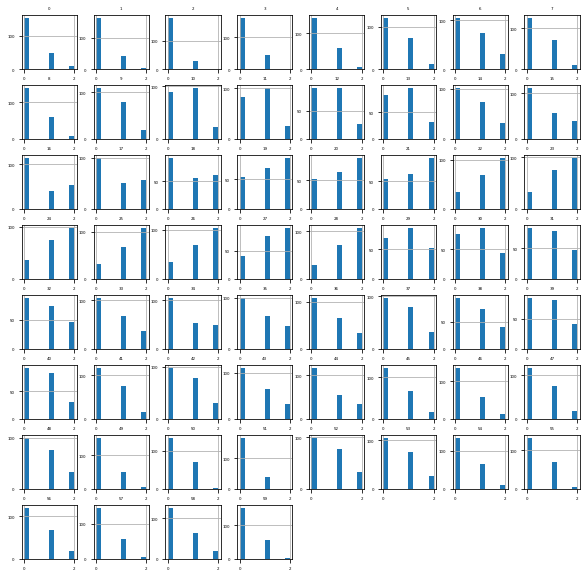

In [103]:
# histograms of the new variables
fig = data_trans_df.hist(xlabelsize=4, ylabelsize=4, figsize=(10,10))
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [104]:
# Generate new data set
new_data=pd.concat([data_trans_df,data[target]], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E52,E53,E54,E55,E56,E57,E58,E59,E60,Target
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,R
1,1.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,R
2,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,R
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,R
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,R


#### Quantile Discretization Transform

<font color='tomato'>Select columns</font>

In [112]:
# retrieve just the numeric input values
data_to_trans = data.values[:, :-1]

<font color='darkgrey'><b>Operation</font>

In [107]:
from sklearn.preprocessing import KBinsDiscretizer
# perform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data_trans = trans.fit_transform(data_to_trans)
# convert the array back to a dataframe
data_trans_df = pd.DataFrame(data_trans)

In [108]:
data_trans_df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,3.0,5.0,6.0,1.0,7.0,5.0,7.0,6.0,8.0,5.0,...,8.0,0.0,3.0,8.0,4.0,9.0,9.0,6.0,7.0,2.0
1,8.0,7.0,9.0,7.0,8.0,9.0,9.0,9.0,9.0,7.0,...,4.0,3.0,4.0,2.0,6.0,9.0,8.0,3.0,3.0,4.0
2,5.0,8.0,9.0,8.0,7.0,9.0,9.0,9.0,9.0,9.0,...,0.0,8.0,8.0,5.0,8.0,9.0,9.0,9.0,7.0,7.0
3,1.0,2.0,7.0,1.0,0.0,0.0,5.0,5.0,1.0,3.0,...,8.0,5.0,1.0,7.0,5.0,5.0,3.0,3.0,2.0,8.0
4,9.0,8.0,6.0,4.0,4.0,2.0,5.0,9.0,9.0,9.0,...,5.0,0.0,2.0,5.0,6.0,0.0,5.0,3.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,3.0,5.0,2.0,1.0,2.0,8.0,8.0,7.0,7.0,7.0,...,7.0,5.0,5.0,8.0,1.0,7.0,5.0,7.0,9.0,9.0
204,7.0,1.0,4.0,6.0,6.0,5.0,4.0,4.0,2.0,6.0,...,1.0,1.0,4.0,7.0,4.0,4.0,2.0,2.0,4.0,6.0
205,8.0,6.0,2.0,3.0,2.0,6.0,5.0,5.0,3.0,7.0,...,5.0,7.0,0.0,2.0,4.0,6.0,8.0,8.0,6.0,2.0
206,6.0,5.0,6.0,7.0,0.0,7.0,7.0,5.0,6.0,6.0,...,1.0,3.0,2.0,6.0,1.0,1.0,2.0,6.0,2.0,4.0


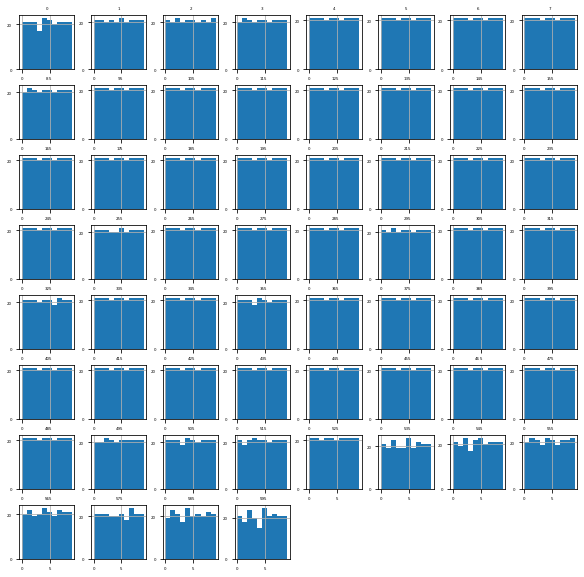

In [109]:
# histograms of the new variables
fig = data_trans_df.hist(xlabelsize=4, ylabelsize=4, figsize=(10,10))
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [104]:
# Generate new data set
new_data=pd.concat([data_trans_df,data[target]], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E52,E53,E54,E55,E56,E57,E58,E59,E60,Target
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,R
1,1.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,R
2,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,R
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,R
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,R


### Quantile Transform Extension: Normal and Uniform

#### Data to Transform

Use dataset as example: Sonar

In [6]:
print(data.shape)

(208, 61)


In [7]:
data

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E52,E53,E54,E55,E56,E57,E58,E59,E60,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


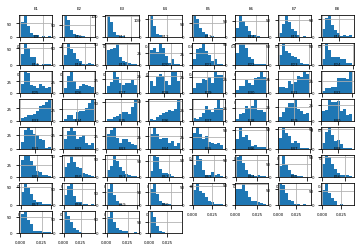

In [8]:
# histograms of the variables
fig = data.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

#### Evaluating a KNN model

##### Evaluating without tranform

In [9]:
# evaluate knn on the raw dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


##### Evaluating Normal Quantile tranform

In [23]:
# evaluate knn on the raw dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.817 (0.087)


##### Evaluating Uniform Quantile tranform

In [24]:
# evaluate knn on the raw dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.845 (0.074)


#### Normal Quantile Transform

<font color='tomato'>Select columns</font>

In [27]:
# Select features to transform
data_to_trans = data.values[:, :-1]

<font color='darkgrey'><b>Operation</font>

In [28]:
# visualize a box-cox transform of the scaled sonar dataset
from sklearn.preprocessing import QuantileTransformer
# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
data_to_trans = trans.fit_transform(data_to_trans)
# convert the array back to a dataframe
data_trans = pd.DataFrame(data_to_trans)

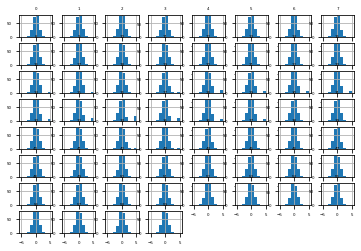

In [29]:
# histograms of the variables
fig = data_trans.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [21]:
# Generate new data set
new_data=pd.concat([data_trans,data[target]], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E52,E53,E54,E55,E56,E57,E58,E59,E60,Target
0,-0.256116,0.282017,0.301127,-0.982009,0.681506,0.081184,0.663652,0.551560,1.255030,0.263955,...,-1.749761,-0.523093,0.872831,-0.086107,1.473959,1.603657,0.415013,0.507896,-0.768147,R
1,1.077697,0.800442,1.331746,0.736953,1.041114,2.026916,1.442733,1.952448,1.375533,0.811288,...,-0.471731,-0.070495,-0.914943,0.327010,1.687965,1.244865,-0.376739,-0.317468,-0.317052,R
2,0.180358,0.961495,1.683384,1.440613,0.716374,1.780405,1.726734,2.079716,2.147311,2.110942,...,1.240491,0.980099,0.011140,1.351189,2.042926,2.200642,1.427749,0.593787,0.620203,R
3,-1.198623,-0.723903,0.880622,-0.992382,-1.368593,-1.415466,-0.054152,0.138250,-1.322177,-0.558893,...,0.120994,-1.185693,0.771889,0.168188,0.061656,-0.379419,-0.517589,-0.658931,1.288713,R
4,1.778717,1.160266,0.479874,-0.151823,-0.102048,-0.650117,0.142077,1.355346,1.485141,1.589206,...,-1.641583,-0.757827,0.170913,0.579117,-1.701751,0.177871,-0.404262,0.782957,0.934708,R


#### Uniform Quantile Transform

<font color='tomato'>Select columns</font>

In [30]:
# Select features to transform
data_to_trans = data.values[:, :-1]

<font color='darkgrey'><b>Operation</font>

In [31]:
# visualize a box-cox transform of the scaled sonar dataset
from sklearn.preprocessing import QuantileTransformer
# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
data_to_trans = trans.fit_transform(data_to_trans)
# convert the array back to a dataframe
data_trans = pd.DataFrame(data_to_trans)

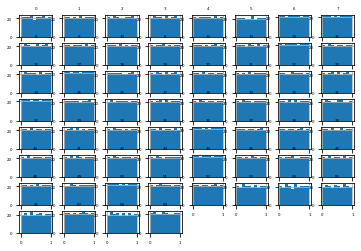

In [32]:
# histograms of the variables
fig = data_trans.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [12]:
# Generate new data set
new_data=pd.concat([data_trans,data[target]], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E52,E53,E54,E55,E56,E57,E58,E59,E60,Target
0,-0.275592,0.270400,0.291419,-0.982829,0.680848,0.077254,0.667974,0.554828,1.261778,0.262281,...,-1.714520,-0.540200,0.882627,-0.107066,1.499641,1.633890,0.400350,0.502761,-0.776736,R
1,1.093320,0.801622,1.347540,0.735530,1.048217,2.028301,1.450303,1.955298,1.382871,0.814053,...,-0.487283,-0.088541,-0.924571,0.312654,1.715447,1.265764,-0.397173,-0.337201,-0.334828,R
2,0.164352,0.967858,1.706388,1.454208,0.716427,1.788322,1.731436,2.076448,2.145065,2.108350,...,1.260374,0.989360,-0.005498,1.376513,2.058982,2.181153,1.455415,0.591789,0.612764,R
3,-1.191697,-0.733065,0.883488,-0.992975,-1.359821,-1.413729,-0.057137,0.135456,-1.320846,-0.563375,...,0.107221,-1.181021,0.778028,0.150290,0.047176,-0.399785,-0.535400,-0.674439,1.306602,R
4,1.812744,1.173239,0.473188,-0.161826,-0.112767,-0.657618,0.140947,1.367785,1.492734,1.594884,...,-1.613589,-0.770133,0.157606,0.572627,-1.670035,0.159755,-0.424272,0.788511,0.938201,R


### Power Transform

#### Data to Transform

Use dataset as example: Sonar

In [6]:
print(data.shape)

(208, 61)


In [7]:
data

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E52,E53,E54,E55,E56,E57,E58,E59,E60,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


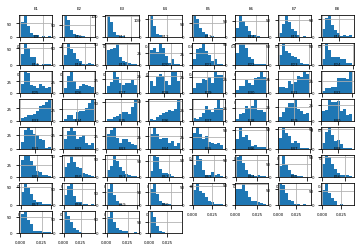

In [8]:
# histograms of the variables
fig = data.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

#### Evaluating a KNN model

##### Evaluating without tranform

In [9]:
# evaluate knn on the raw dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


##### Evaluating Box-Cox tranform

In [6]:
# evaluate knn on the raw dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.085)


##### Evaluating Yeo-Johnson tranform

In [7]:
# evaluate knn on the raw dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.082)


##### Evaluating Yeo-Johnson tranform standardizing the raw dataset prior to performing a Yeo-Johnson transform.

In [8]:
# evaluate knn on the raw dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
dataset = data.values
# separate into input and output columns
X, y = dataset[:, :-1], dataset[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.077)


#### Box-Cox Transform

<font color='tomato'>Select columns</font>

In [18]:
# Select features to transform
data_to_trans = data.values[:, :-1]

<font color='darkgrey'><b>Operation</font>

In [19]:
# visualize a box-cox transform of the scaled sonar dataset
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_to_trans = pipeline.fit_transform(data_to_trans)
# convert the array back to a dataframe
data_trans = pd.DataFrame(data_to_trans)

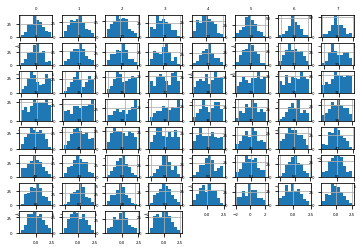

In [20]:
# histograms of the variables
fig = data_trans.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [21]:
# Generate new data set
new_data=pd.concat([data_trans,data[target]], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E52,E53,E54,E55,E56,E57,E58,E59,E60,Target
0,-0.256116,0.282017,0.301127,-0.982009,0.681506,0.081184,0.663652,0.551560,1.255030,0.263955,...,-1.749761,-0.523093,0.872831,-0.086107,1.473959,1.603657,0.415013,0.507896,-0.768147,R
1,1.077697,0.800442,1.331746,0.736953,1.041114,2.026916,1.442733,1.952448,1.375533,0.811288,...,-0.471731,-0.070495,-0.914943,0.327010,1.687965,1.244865,-0.376739,-0.317468,-0.317052,R
2,0.180358,0.961495,1.683384,1.440613,0.716374,1.780405,1.726734,2.079716,2.147311,2.110942,...,1.240491,0.980099,0.011140,1.351189,2.042926,2.200642,1.427749,0.593787,0.620203,R
3,-1.198623,-0.723903,0.880622,-0.992382,-1.368593,-1.415466,-0.054152,0.138250,-1.322177,-0.558893,...,0.120994,-1.185693,0.771889,0.168188,0.061656,-0.379419,-0.517589,-0.658931,1.288713,R
4,1.778717,1.160266,0.479874,-0.151823,-0.102048,-0.650117,0.142077,1.355346,1.485141,1.589206,...,-1.641583,-0.757827,0.170913,0.579117,-1.701751,0.177871,-0.404262,0.782957,0.934708,R


#### Yeo-Johnson Transform

<font color='tomato'>Select columns</font>

In [9]:
# Select features to transform
data_to_trans = data.values[:, :-1]

<font color='darkgrey'><b>Operation</font>

In [13]:
# visualize a box-cox transform of the scaled sonar dataset
from sklearn.preprocessing import PowerTransformer
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data_to_trans = pt.fit_transform(data_to_trans)
# convert the array back to a dataframe
data_trans = pd.DataFrame(data_to_trans)

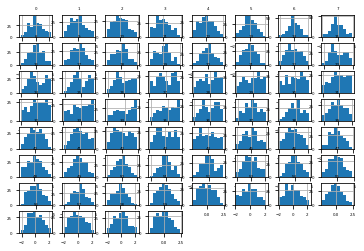

In [11]:
# histograms of the variables
fig = data_trans.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [12]:
# Generate new data set
new_data=pd.concat([data_trans,data[target]], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E52,E53,E54,E55,E56,E57,E58,E59,E60,Target
0,-0.275592,0.270400,0.291419,-0.982829,0.680848,0.077254,0.667974,0.554828,1.261778,0.262281,...,-1.714520,-0.540200,0.882627,-0.107066,1.499641,1.633890,0.400350,0.502761,-0.776736,R
1,1.093320,0.801622,1.347540,0.735530,1.048217,2.028301,1.450303,1.955298,1.382871,0.814053,...,-0.487283,-0.088541,-0.924571,0.312654,1.715447,1.265764,-0.397173,-0.337201,-0.334828,R
2,0.164352,0.967858,1.706388,1.454208,0.716427,1.788322,1.731436,2.076448,2.145065,2.108350,...,1.260374,0.989360,-0.005498,1.376513,2.058982,2.181153,1.455415,0.591789,0.612764,R
3,-1.191697,-0.733065,0.883488,-0.992975,-1.359821,-1.413729,-0.057137,0.135456,-1.320846,-0.563375,...,0.107221,-1.181021,0.778028,0.150290,0.047176,-0.399785,-0.535400,-0.674439,1.306602,R
4,1.812744,1.173239,0.473188,-0.161826,-0.112767,-0.657618,0.140947,1.367785,1.492734,1.594884,...,-1.613589,-0.770133,0.157606,0.572627,-1.670035,0.159755,-0.424272,0.788511,0.938201,R


#### Yeo-Johnson Transform standardizing the raw dataset prior to performing a Yeo-Johnson transform.

<font color='tomato'>Select columns</font>

In [17]:
# Select features to transform
data_to_trans = data.values[:, :-1]

<font color='darkgrey'><b>Operation</font>

In [18]:
# visualize a box-cox transform of the scaled sonar dataset
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data_to_trans = trans.fit_transform(data_to_trans)
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data_to_trans = pt.fit_transform(data_to_trans)
# convert the array back to a dataframe
data_trans = pd.DataFrame(data_to_trans)

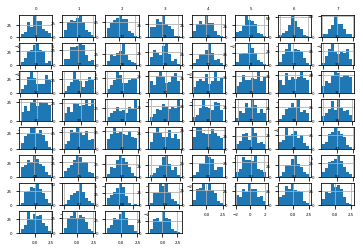

In [19]:
# histograms of the variables
fig = data_trans.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [20]:
# Generate new data set
new_data=pd.concat([data_trans,data[target]], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E52,E53,E54,E55,E56,E57,E58,E59,E60,Target
0,-0.241620,0.316306,0.338898,-0.998859,0.691468,0.101385,0.670644,0.570431,1.219318,0.284093,...,-1.761075,-0.531441,0.867891,-0.065798,1.425368,1.559323,0.447521,0.532990,-0.772583,R
1,1.052600,0.802508,1.272710,0.750716,1.018265,2.014869,1.416709,1.919037,1.333054,0.808316,...,-0.467646,-0.063128,-0.933581,0.356818,1.639416,1.210403,-0.366905,-0.309812,-0.297841,R
2,0.215537,0.946574,1.603537,1.367406,0.723413,1.750161,1.699301,2.061233,2.162748,2.139162,...,1.195864,0.967360,0.023328,1.307027,2.033457,2.312577,1.374061,0.613574,0.639765,R
3,-1.222721,-0.731568,0.873896,-1.009743,-1.384731,-1.433033,-0.037295,0.165897,-1.342003,-0.568163,...,0.151841,-1.193488,0.772255,0.197545,0.086881,-0.374766,-0.515125,-0.669244,1.237197,R
4,1.711477,1.124161,0.510736,-0.118979,-0.079047,-0.658975,0.162928,1.318266,1.438560,1.558155,...,-1.656964,-0.770582,0.187709,0.597904,-1.706220,0.207321,-0.395906,0.787624,0.921827,R


## <font color='green'>Data Save</font>

<font color='tomato'> Identificamos los datos a guardar</font>

In [7]:
data_to_save = data

<font color='tomato'>Extensión añadida al nombre del fichero: será el número del proceso que lo genera (e.g. diabetes_06).</font>

<font color='tomato'>En caso de generarse varios ficheros llevarán _01 _02 ... después (e.g. diabetes_06_01).</font>

In [8]:
# Proceso 07
extension='_07'

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [11]:
# Guardamos el fichero
file_save=basename(file_data).replace('.csv',extension+'.csv')
path_save="Data/Output/"+file_save
path_out=GUI.filesavebox(title='Save Data File',default=path_save)
data_to_save.to_csv(path_out, index=False)
print('Falie saved as:')
path_out

Falie saved as:


<font color='tomato'><b> OPCION B:</b> Uso del código que va a Pilot Deploy</font>

In [10]:
file_save=basename(file_name).replace('.csv',extension+'.csv')
data_to_save.to_csv('Data/Output/' + file_save, index=False)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

Ejemplos
- Se han modificado los nombres de las columnas
- Se han eliminado blancos en los nombres de las columnas
- Se han traducido los nombres de las columnas

## <font color=' #2874a6 '>Main Conclusions</font>

Ejemplos
- Los nombre de las columnas de origen son muy largos lo que provoca que ...
- ......

## <font color='RED'>CODE TO DEPLOY</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- xxxxxx
- xxxxxx
- xxxxxx

<font color=' red '><b>CODE</b></font>

In [1]:
# 
